In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

### Предварительная загрузка датасета
1. Загрузка датасета. 

In [2]:
weather = pd.read_csv("weather.csv")

2. Просмотр и оценка структуры данных, проверка на пропущенные значения.

In [3]:
weather.head()

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


In [4]:
weather.describe()

,Data.Precipitation,Date.Month,Date.Week of,Date.Year,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
count,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000
mean,0.579090,6.343128,15.650242,2016.018933,56.089112,66.042406,45.642716,18.791316,6.329820
std,0.988057,3.490723,8.923425,0.136294,18.798295,19.787954,18.559263,6.461527,3.494785
min,0.000000,1.000000,1.000000,2016.000000,-27.000000,-19.000000,-35.000000,0.000000,0.000000
25%,0.000000,3.000000,8.000000,2016.000000,44.000000,53.000000,33.000000,15.000000,4.040000
50%,0.190000,6.000000,16.000000,2016.000000,58.000000,68.000000,47.000000,19.000000,5.940000
75%,0.750000,9.000000,24.000000,2016.000000,71.000000,82.000000,60.000000,23.000000,8.080000
max,20.890000,12.000000,31.000000,2017.000000,100.000000,111.000000,88.000000,36.000000,61.100000


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16743 entries, 0 to 16742
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data.Precipitation         16743 non-null  float64
 1   Date.Full                  16743 non-null  object 
 2   Date.Month                 16743 non-null  int64  
 3   Date.Week of               16743 non-null  int64  
 4   Date.Year                  16743 non-null  int64  
 5   Station.City               16743 non-null  object 
 6   Station.Code               16743 non-null  object 
 7   Station.Location           16743 non-null  object 
 8   Station.State              16743 non-null  object 
 9   Data.Temperature.Avg Temp  16743 non-null  int64  
 10  Data.Temperature.Max Temp  16743 non-null  int64  
 11  Data.Temperature.Min Temp  16743 non-null  int64  
 12  Data.Wind.Direction        16743 non-null  int64  
 13  Data.Wind.Speed            16743 non-null  flo

In [6]:
weather.isnull().sum()

Data.Precipitation           0
Date.Full                    0
Date.Month                   0
Date.Week of                 0
Date.Year                    0
Station.City                 0
Station.Code                 0
Station.Location             0
Station.State                0
Data.Temperature.Avg Temp    0
Data.Temperature.Max Temp    0
Data.Temperature.Min Temp    0
Data.Wind.Direction          0
Data.Wind.Speed              0
dtype: int64

3. Обработка пропущенных значений.<br>
*Пропущенных значений нет*

4. Преобразование категориальных признаков в числовые.

In [7]:
le = LabelEncoder()
weather['Station.City'] = le.fit_transform(weather['Station.City'])
weather['Station.State'] = le.fit_transform(weather['Station.State'])

5. Удаление ненужных переменных: удалить переменные, которые не будут использоваться при построении модели регрессии. Удаление дубликатов, если таковые имеются.

In [8]:
weather.drop_duplicates(keep='last')
weather = weather.drop(['Date.Full', 'Station.Code', 'Station.Location', 'Data.Temperature.Min Temp','Data.Temperature.Max Temp' ], axis=1)

6. Масштабирование числовых признаков (например, стандартизация или нормализация).

In [9]:
scaler = StandardScaler()
numerical_features = ['Data.Precipitation', 'Data.Temperature.Avg Temp',
					  'Data.Wind.Direction', 'Data.Wind.Speed']
weather_normalized = weather.copy()
weather_normalized[numerical_features] = scaler.fit_transform(weather_normalized[numerical_features])
weather_normalized.head()

,Data.Precipitation,Date.Month,Date.Week of,Date.Year,Station.City,Station.State,Data.Temperature.Avg Temp,Data.Wind.Direction,Data.Wind.Speed
0,-0.586107,1,3,2016,31,0,-0.909105,2.199032,-0.572247
1,-0.586107,1,3,2016,137,0,-0.909105,2.044266,-0.706737
2,-0.424169,1,3,2016,189,0,-0.536720,2.508566,0.972959
3,-0.586107,1,3,2016,191,0,-0.589918,2.044266,0.151710
4,-0.575986,1,3,2016,10,1,-1.175094,0.032297,0.420691


#### Визуализация данных
1. Изучение распределения целевой переменной.

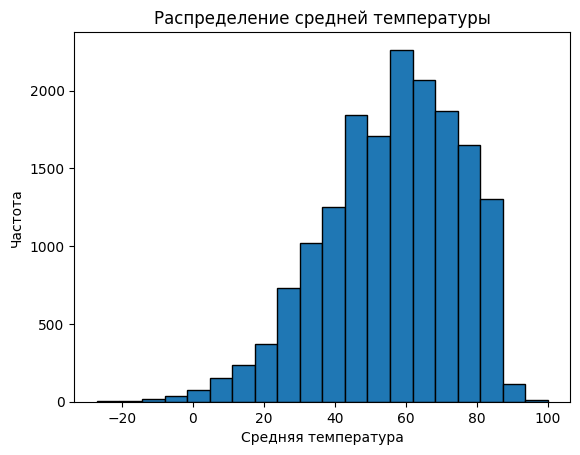

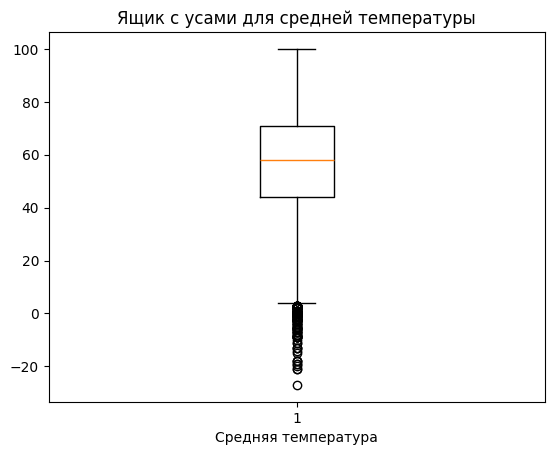

In [10]:
plt.hist(weather['Data.Temperature.Avg Temp'], bins=20, edgecolor='k')
plt.title('Распределение средней температуры')
plt.xlabel('Средняя температура')
plt.ylabel('Частота')
plt.show()

plt.boxplot(weather['Data.Temperature.Avg Temp'])
plt.title('Ящик с усами для средней температуры')
plt.xlabel('Средняя температура')
plt.show()

2. Изучение корреляции между числовыми признаками и целевой переменной.

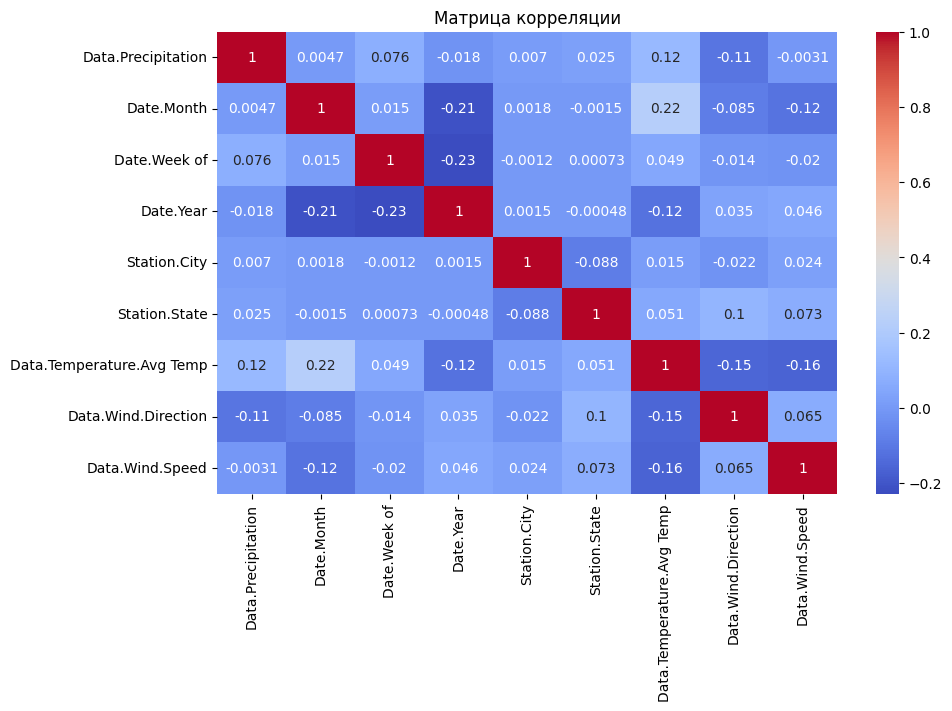

In [11]:
correlation_matrix = weather.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Матрица корреляции")
plt.show()

3. Построение графиков зависимости целевой переменной от различных признаков.

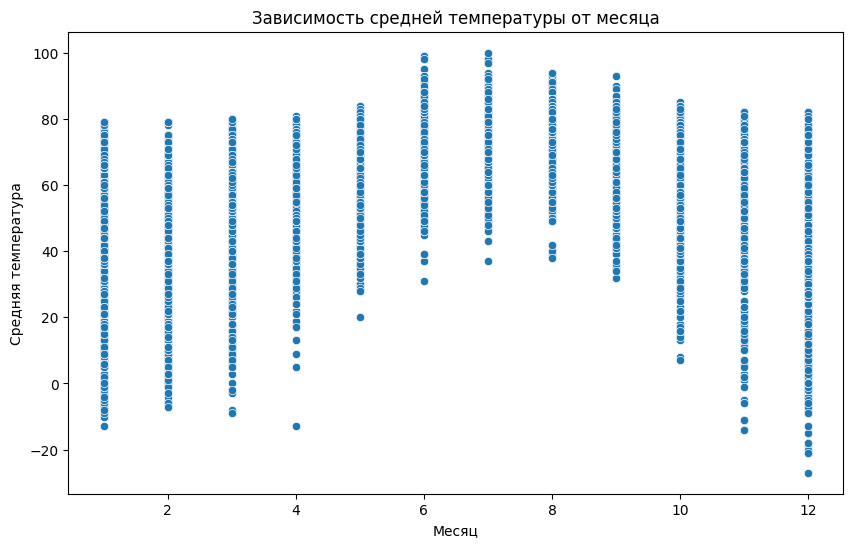

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date.Month', y='Data.Temperature.Avg Temp', data=weather)
plt.title('Зависимость средней температуры от месяца')
plt.xlabel('Месяц')
plt.ylabel('Средняя температура')
plt.show()

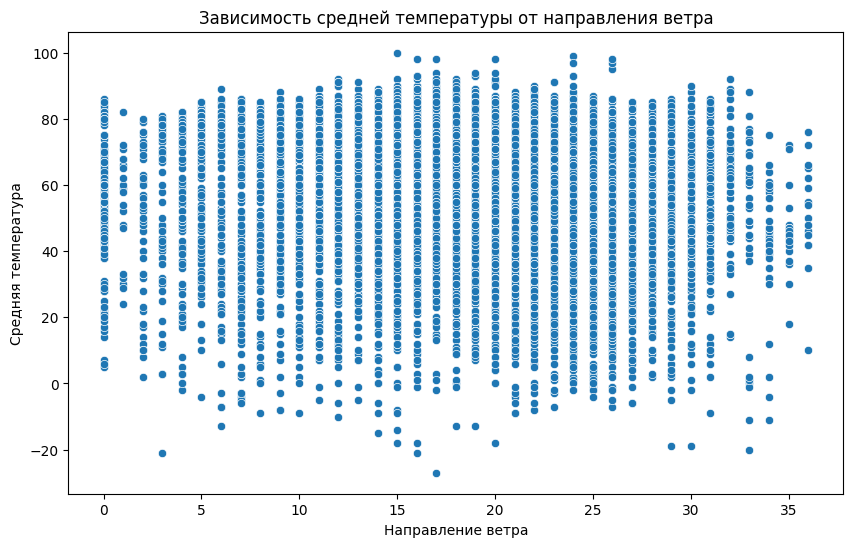

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Data.Wind.Direction', y='Data.Temperature.Avg Temp', data=weather)
plt.title('Зависимость средней температуры от направления ветра')
plt.xlabel('Направление ветра')
plt.ylabel('Средняя температура')
plt.show()

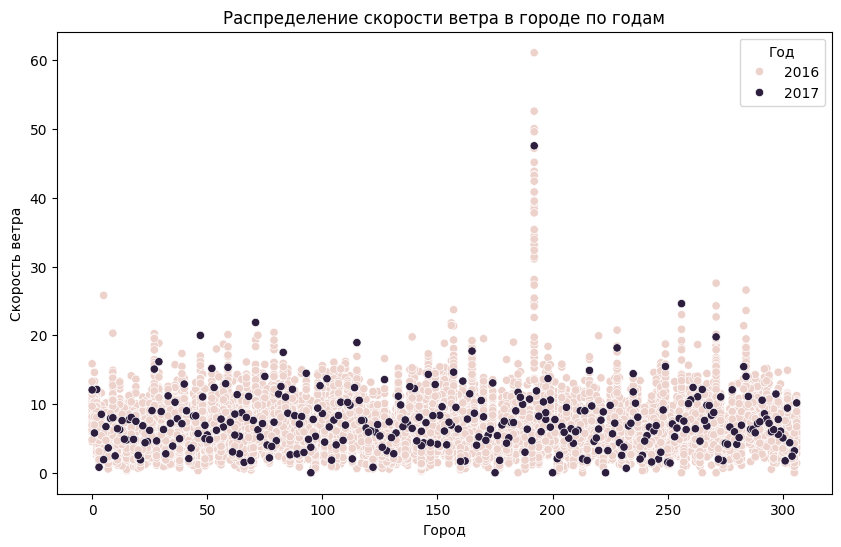

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Station.City', y='Data.Wind.Speed', hue='Date.Year', data=weather)
plt.title('Распределение скорости ветра в городе по годам')
plt.xlabel('Город')
plt.ylabel('Скорость ветра')
plt.legend(title='Год')
plt.show()


#### Построение регрессии
1. Выделение признаков и целевой переменной.

In [15]:
X = weather_normalized.drop('Data.Temperature.Avg Temp', axis=1)
y = weather_normalized['Data.Temperature.Avg Temp']

2. Разделение данных на тренировочный и тестовый наборы с использованием метода train_test_split.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

3. Импорт модели регрессии (например, LinearRegression или RandomForestRegressor).

In [17]:
model = LinearRegression()

4. Обучение модели на тренировочных данных.

In [18]:
model.fit(X_train, y_train)

LinearRegression()

5. Оценка качества модели на тестовых данных.

In [19]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

MSE: 0.8933258530722272
R2 Score: 0.10528247538736879


6. Анализ результатов (например, выявление наиболее важных признаков, интерпретация коэффициентов модели).

In [20]:
coefficients = pd.DataFrame({'Признак': X.columns, 'Коэффициент': model.coef_})
print(coefficients)

               Признак  Коэффициент
0   Data.Precipitation     0.100108
1           Date.Month     0.050334
2         Date.Week of     0.001461
3            Date.Year    -0.490883
4         Station.City     0.000226
5        Station.State     0.004655
6  Data.Wind.Direction    -0.127013
7      Data.Wind.Speed    -0.140821


7. Улучшение модели путем изменения гиперпараметров или выбора другой модели.

In [21]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - MSE: {mse_rf}')
print(f'Random Forest - R2 Score: {r2_rf}')

Random Forest - MSE: 0.11502106752055345
Random Forest - R2 Score: 0.8847997464123863
